# 1. Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

%matplotlib inline

# 2. Data

In [2]:
#read data
df24 = pd.read_csv('https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-24.csv')
df24.head()

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
0,1,2018-07-24 04:32:05,442,Wzgórza Krzesławickie,5,Krowodrza Górka,2018-07-24 04:32:00,6.352185e+18,6351558574044490242,STOPPING,0,1.0
1,2,2018-07-24 04:32:08,2690,Kampus UJ,11,Mały Płaszów,2018-07-24 04:32:00,6.352185e+18,6351558574044654082,STOPPING,0,3.0
2,2,2018-07-24 04:32:13,1360,Plac Wszystkich Świętych,8,Bronowice Małe,2018-07-24 04:32:00,6.352185e+18,6351558574044551682,STOPPING,0,14.0
3,2,2018-07-24 04:32:14,133,Wesele,4,Wzgórza K.,2018-07-24 04:32:00,6.352185e+18,6351558574044477954,STOPPING,0,3.0
4,2,2018-07-24 04:32:17,716,Piaski Nowe,24,Bronowice Małe,2018-07-24 04:31:00,6.352185e+18,6351558574044908034,STOPPING,1,4.0


# Delays distribution

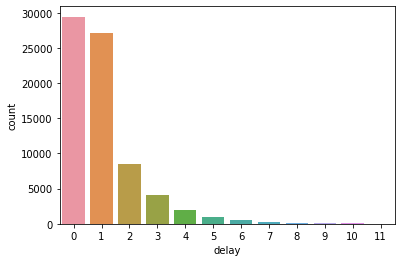

In [3]:
#plot histogram
sns.countplot(x='delay', data=df24)

In [4]:
#count how many vehicles were delayed by how many minutes
df24.delay.value_counts()

0     29457
1     27100
2      8468
3      4101
4      1948
5      1005
6       484
7       300
8       129
9        94
10       82
11       34
Name: delay, dtype: int64

In [5]:
#normalized value of delayed vehicles
df24.delay.value_counts(normalize = True)

0     0.402407
1     0.370208
2     0.115680
3     0.056023
4     0.026611
5     0.013729
6     0.006612
7     0.004098
8     0.001762
9     0.001284
10    0.001120
11    0.000464
Name: delay, dtype: float64

In [6]:
#describe data
df24.delay.describe()

count    73202.000000
mean         1.055053
std          1.347920
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         11.000000
Name: delay, dtype: float64

# Delays over specific period of time

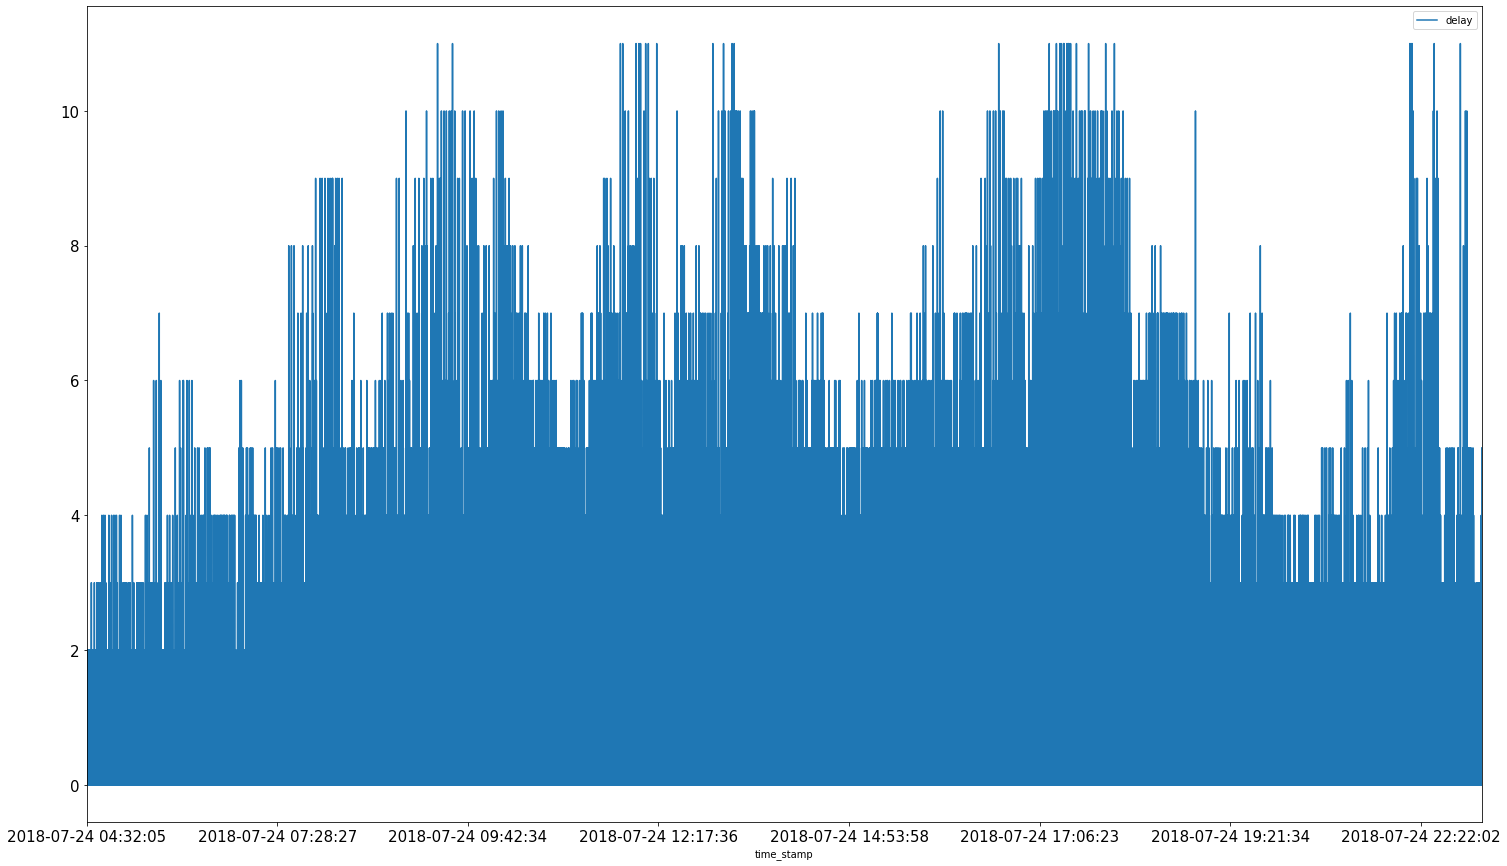

In [7]:
#plot delay over time stamp
df24.plot(x='time_stamp', y='delay', kind='line', figsize=(25,15), fontsize=15)

# Delays on tram stops

In [8]:
#mean delay for given stop
stopMeanDelay = df24.groupby('stopName').delay.mean().reset_index(name='stopMeanDelay')

In [9]:
stopMeanDelay

,stopName,stopMeanDelay
0,AWF,1.039301
1,Agencja Kraków Wschód,1.234043
2,Bardosa,0.723301
3,Batorego,1.513548
4,Białucha,1.161337
...,...,...
148,Ćwiklińskiej,0.600000
149,Łagiewniki,0.964630
150,Łagiewniki ZUS,2.198925
151,Św.Gertrudy,1.281163


In [10]:
stopMeanDelay.describe()

,stopMeanDelay
count,153.000000
mean,0.982131
std,0.396873
min,0.127273
25%,0.753521
50%,0.964630
75%,1.207447
max,2.198925


In [11]:
#mean delay sorted
stopMeanDelay.sort_values(by='stopMeanDelay',ascending=False)

,stopName,stopMeanDelay
150,Łagiewniki ZUS,2.198925
75,Nowosądecka,2.091667
88,Piaski Nowe,2.008310
29,Dauna,1.964088
31,Dworcowa,1.793187
...,...,...
25,Czerwone Maki P+R,0.227273
59,Krowodrza Górka,0.157480
145,Wzgórza Krzesławickie,0.143646
20,Cichy Kącik,0.135417


In [12]:
stopMeanDelay.sort_values(by='stopMeanDelay',ascending=False).head(10)

,stopName,stopMeanDelay
150,Łagiewniki ZUS,2.198925
75,Nowosądecka,2.091667
88,Piaski Nowe,2.008310
29,Dauna,1.964088
31,Dworcowa,1.793187
22,Cmentarz Podgórski,1.788063
48,Kabel,1.787091
152,Św.Wawrzyńca,1.771654
117,Smolki,1.753623
90,Plac Bohaterów Getta,1.696252


In [13]:
stopMeanDelay.sort_values(by='stopMeanDelay',ascending=True).head(10)

,stopName,stopMeanDelay
23,Cmentarz Rakowicki,0.127273
20,Cichy Kącik,0.135417
145,Wzgórza Krzesławickie,0.143646
59,Krowodrza Górka,0.157480
25,Czerwone Maki P+R,0.227273
102,Rakowicka,0.245455
67,Mały Płaszów,0.261194
84,Os.Piastów,0.297872
76,Nowy Bieżanów P+R,0.311111
9,Borek Fałęcki,0.325301


# Delays of tram lines

In [14]:
#mean delay by line
lineMeanDelay = df24.groupby(['number', 'direction']).delay.mean().reset_index(name='lineMeanDelay')

In [15]:
lineMeanDelay

,number,direction,lineMeanDelay
0,1,Salwator,0.797200
1,1,Wzgórza K.,1.036821
2,2,Cm. Rakowicki,0.364815
3,2,Salwator,0.480000
4,3,Dworzec Tow.,1.229167
5,3,Krowodrza Górka,0.758987
6,3,Nowy Bieżanów P+R,1.175353
7,4,Bronowice Małe,0.479460
8,4,Kombinat,1.423077
9,4,Wzgórza K.,1.018507


In [16]:
#mean delay by line sorted
lineMeanDelay.sort_values(by='lineMeanDelay')

,number,direction,lineMeanDelay
2,2,Cm. Rakowicki,0.364815
7,4,Bronowice Małe,0.479460
3,2,Salwator,0.480000
20,11,Czerwone Maki P+R,0.542401
10,5,Krowodrza Górka,0.565964
33,20,Cichy Kącik,0.583186
35,21,Kombinat,0.666667
39,22,Kombinat,0.695652
45,44,Kopiec Wandy,0.712329
29,18,Czerwone Maki P+R,0.716060


In [17]:
lineMeanDelay.sort_values(by='lineMeanDelay',ascending=False).head(10)

,number,direction,lineMeanDelay
41,24,Bronowice Małe,2.078532
42,24,Kurdwanów P+R,2.005641
31,19,Borek Fałęcki,1.872424
40,22,Walcownia,1.718242
18,10,Kopiec Wandy,1.467078
23,13,Nowy Bieżanów P+R,1.452522
47,50,Prokocim,1.447093
8,4,Kombinat,1.423077
14,8,Borek Fałęcki,1.390722
13,6,Salwator,1.378760


In [18]:
lineMeanDelay.sort_values(by='lineMeanDelay',ascending=True).head(10)

,number,direction,lineMeanDelay
2,2,Cm. Rakowicki,0.364815
7,4,Bronowice Małe,0.479460
3,2,Salwator,0.480000
20,11,Czerwone Maki P+R,0.542401
10,5,Krowodrza Górka,0.565964
33,20,Cichy Kącik,0.583186
35,21,Kombinat,0.666667
39,22,Kombinat,0.695652
45,44,Kopiec Wandy,0.712329
29,18,Czerwone Maki P+R,0.716060


In [19]:
#mean delay by number and direction
lineMeanDelay['number and direction'] = lineMeanDelay.agg('{0[number]} {0[direction]}'.format, axis=1)

In [20]:
lineMeanDelay

,number,direction,lineMeanDelay,number and direction
0,1,Salwator,0.797200,1 Salwator
1,1,Wzgórza K.,1.036821,1 Wzgórza K.
2,2,Cm. Rakowicki,0.364815,2 Cm. Rakowicki
3,2,Salwator,0.480000,2 Salwator
4,3,Dworzec Tow.,1.229167,3 Dworzec Tow.
5,3,Krowodrza Górka,0.758987,3 Krowodrza Górka
6,3,Nowy Bieżanów P+R,1.175353,3 Nowy Bieżanów P+R
7,4,Bronowice Małe,0.479460,4 Bronowice Małe
8,4,Kombinat,1.423077,4 Kombinat
9,4,Wzgórza K.,1.018507,4 Wzgórza K.


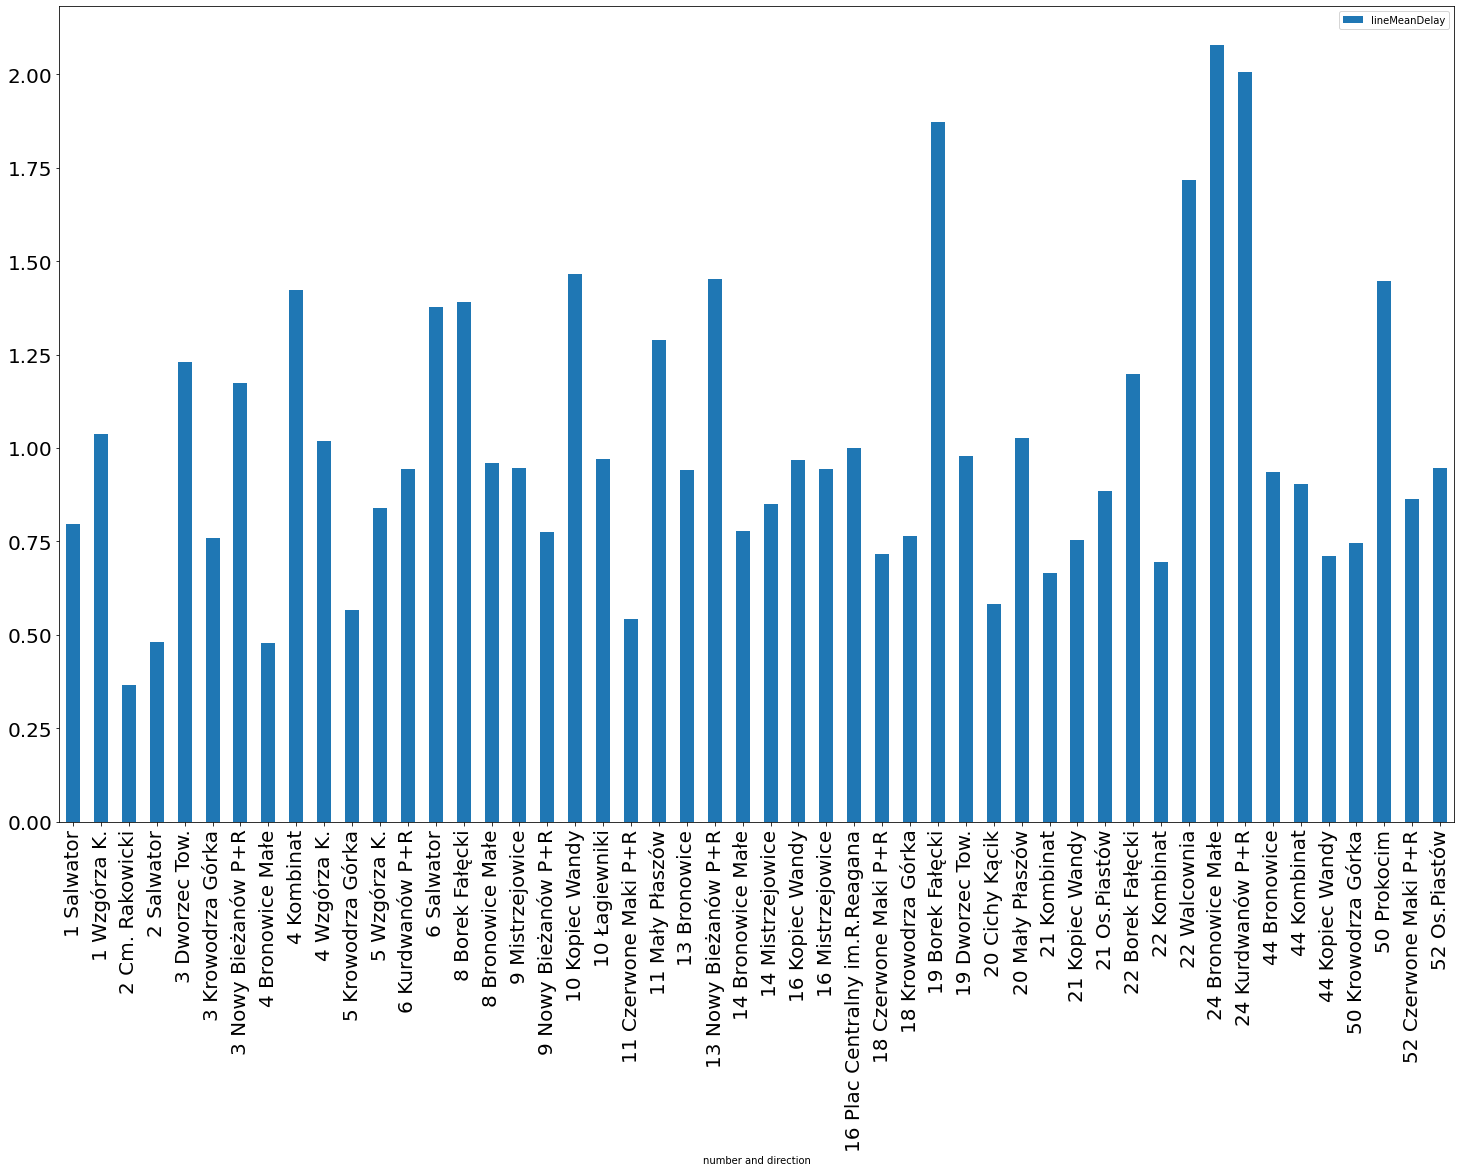

In [21]:
#mean delay by number and direction
lineMeanDelay.plot(x='number and direction', y='lineMeanDelay', kind='bar', figsize=(25,15), fontsize=20)

# Machine Learning model

In [22]:
#column display
df24.columns

Index(['index', 'time_stamp', 'stop', 'stopName', 'number', 'direction',
       'plannedTime', 'vehicleId', 'tripId', 'status', 'delay', 'seq_num'],
      dtype='object')

In [23]:
#conversion to datetime, sort delay by hour
df24['plannedTime'] = pd.to_datetime (df24['plannedTime'])
df24[['plannedTime']].info()

df24['plannedTime'].dt.hour.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73202 entries, 0 to 73201
Data columns (total 1 columns):
plannedTime    73202 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 572.0 KB


15    4567
8     4544
17    4544
7     4538
16    4536
18    4413
6     4364
9     4275
14    4082
19    4003
10    3847
11    3831
12    3769
13    3699
20    3448
5     3097
21    2999
22    2769
23    1400
4      459
0       18
Name: plannedTime, dtype: int64

In [24]:
df24['delay_secs'] = df24['delay'].map(lambda x: x*60) #change delay to seconds
df24['direction_cat'] = df24['direction'].factorize()[0] #factorize direction
df24['vehicleId'].fillna(-1, inplace = True) #fill null with -1
df24['seq_num'].fillna(-1, inplace = True) #fill null with -1

def gen_id_num_direction(x):
    """
    This function combines two variables, i.e. tram number
    and direction in which this tram is going
    Input:
        x: dataframe
    Output:
        new feature combining tram number and direction  
    """
    return '{} {}'.format(x['number'], x['direction'])
df24['number_direction_id'] = df24.apply(gen_id_num_direction, axis = 1).factorize()[0]

def gen_id_stop_direction(x):
    """
    This function combines two variables, i.e. tram stop
    and direction in which this tram is going
    Input:
        x: dataframe
    Output:
        new feature combining tram stop and direction  
    """
    return '{} {}'.format(x['stop'], x['direction'])
df24['stop_direction_id'] = df24.apply(gen_id_stop_direction, axis = 1).factorize()[0]

#create combinations
feats1 = [
    'number'
]
X1 = df24[ feats1 ].values

feats2 = [
    'number',
    'stop'
]
X2 = df24[ feats2 ].values

feats3 = [
    'number',
    'stop',
    'direction_cat'
]
X3 = df24[ feats3 ].values

feats4 = [
    'number',
    'stop',
    'direction_cat',
    'vehicleId'
]
X4 = df24[ feats4 ].values

feats5 = [
    'number',
    'stop',
    'direction_cat',
    'vehicleId',
    'seq_num'
]
X5 = df24[ feats5 ].values

feats6 = [
    'number',
    'stop',
    'direction_cat',
    'vehicleId',
    'seq_num',
    'number_direction_id'
]
X6 = df24[ feats6 ].values

feats7 = [
    'number',
    'stop',
    'direction_cat',
    'vehicleId',
    'seq_num',
    'number_direction_id',
    'stop_direction_id'
]
X7 = df24[ feats7 ].values

y = df24['delay_secs'].values


model = DecisionTreeRegressor(max_depth=10, random_state=0) #model
#cross validation scores for specific combinations
scores1 = cross_val_score(model, X1, y, cv=5, scoring='neg_mean_absolute_error')
scores2 = cross_val_score(model, X2, y, cv=5, scoring='neg_mean_absolute_error')
scores3 = cross_val_score(model, X3, y, cv=5, scoring='neg_mean_absolute_error')
scores4 = cross_val_score(model, X4, y, cv=5, scoring='neg_mean_absolute_error')
scores5 = cross_val_score(model, X5, y, cv=5, scoring='neg_mean_absolute_error')
scores6 = cross_val_score(model, X6, y, cv=5, scoring='neg_mean_absolute_error')
scores7 = cross_val_score(model, X7, y, cv=5, scoring='neg_mean_absolute_error')

In [25]:
#value of error for specific combinations
Data = [(abs(np.mean(scores1))),
        (abs(np.mean(scores2))),
        (abs(np.mean(scores3))),
        (abs(np.mean(scores4))),
        (abs(np.mean(scores5))),
        (abs(np.mean(scores6))),
        (abs(np.mean(scores7)))]
        
df24 = pd.DataFrame(Data, index=['feats1','feats2','feats3','feats4','feats5','feats6','feats7'], columns=['np.mean'])

In [26]:
df24

,np.mean
feats1,54.710845
feats2,53.646152
feats3,51.493884
feats4,49.650312
feats5,48.743480
feats6,48.317763
feats7,48.331660


In [27]:
#search for best combination
minVal24 = df24.min()
 
print('Minimum value is: ')
print(minVal24)


minValInd24 = df24.idxmin()
 
print("Min value is at row index position:")
print(minValInd24)

Minimum value is: 
np.mean    48.317763
dtype: float64
Min value is at row index position:
np.mean    feats6
dtype: object


In [28]:
feats6

['number',
 'stop',
 'direction_cat',
 'vehicleId',
 'seq_num',
 'number_direction_id']

In [29]:
#standard deviation for best combination
np.std(scores6)

3.5083465856991904